In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split


## Carregar e visualizar os dados  - Regressão


In [2]:
df_colesterol = pd.read_csv('./dataset_colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.160000,76.487500,174.868000,199.453260
std,288.819436,17.494755,21.411086,8.855337,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.775000,167.000000,166.345000
50%,500.500000,48.500000,75.450000,175.000000,199.455000
75%,750.250000,64.250000,89.975000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [5]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23


In [6]:
import plotly.express as px

px.bar(df_colesterol.value_counts('Nível de Atividade')/len(df_colesterol) * 100)

In [7]:
px.bar(df_colesterol.value_counts('Fumante')/len(df_colesterol) * 100)

In [8]:
px.bar(df_colesterol.value_counts('Grupo Sanguíneo')/len(df_colesterol) * 100)

In [9]:
# Ajustar o Dataframe
df_colesterol.drop(columns=['Id'],axis=1,inplace=True)

# Aplicar OneHotEncoding nas variáveis Categoricas
df_colesterol = pd.get_dummies(df_colesterol,columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade']).astype("int64")

In [10]:
df_colesterol.head()

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85,186,199,0,0,1,0,0,1,0,1,0
1,68,105,184,236,1,0,0,0,1,0,0,0,1
2,25,64,180,161,0,0,0,1,1,0,1,0,0
3,43,120,167,336,1,0,0,0,1,0,1,0,0
4,79,88,175,226,0,1,0,0,1,0,0,1,0


## Treinar Modelo de Regressão Linear

In [11]:
X = df_colesterol.drop('Colesterol', axis=1)
y = df_colesterol['Colesterol']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [13]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Apresentar Plots Shapley Values - Regressão

In [14]:
# Rodar o explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [15]:
# Calcular o Shapley Values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

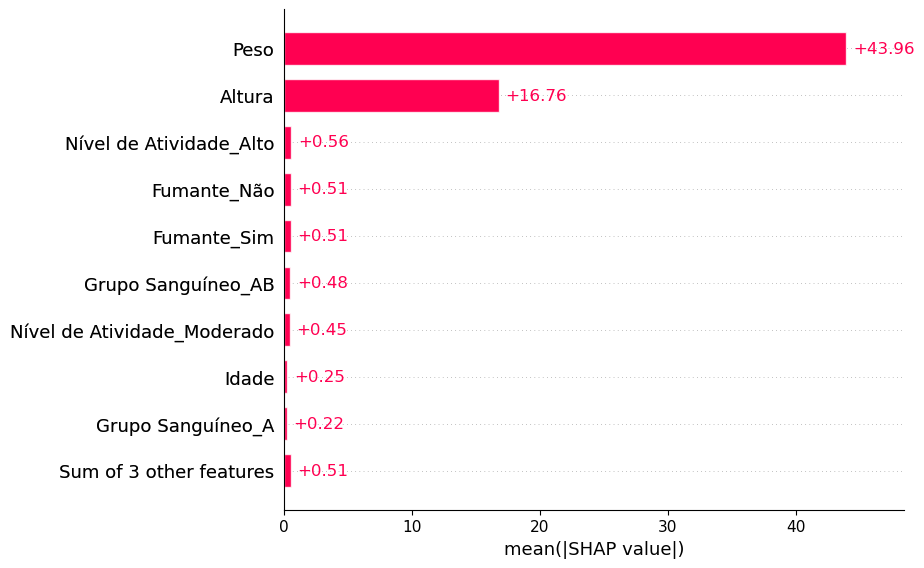

In [16]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_reg)

In [17]:
# Mostrar 1° instância do conjunto de testes
X_test.iloc[0,:]

Idade                           29
Peso                            87
Altura                         179
Grupo Sanguíneo_A                0
Grupo Sanguíneo_AB               1
Grupo Sanguíneo_B                0
Grupo Sanguíneo_O                0
Fumante_Não                      1
Fumante_Sim                      0
Nível de Atividade_Alto          0
Nível de Atividade_Baixo         1
Nível de Atividade_Moderado      0
Name: 833, dtype: int64

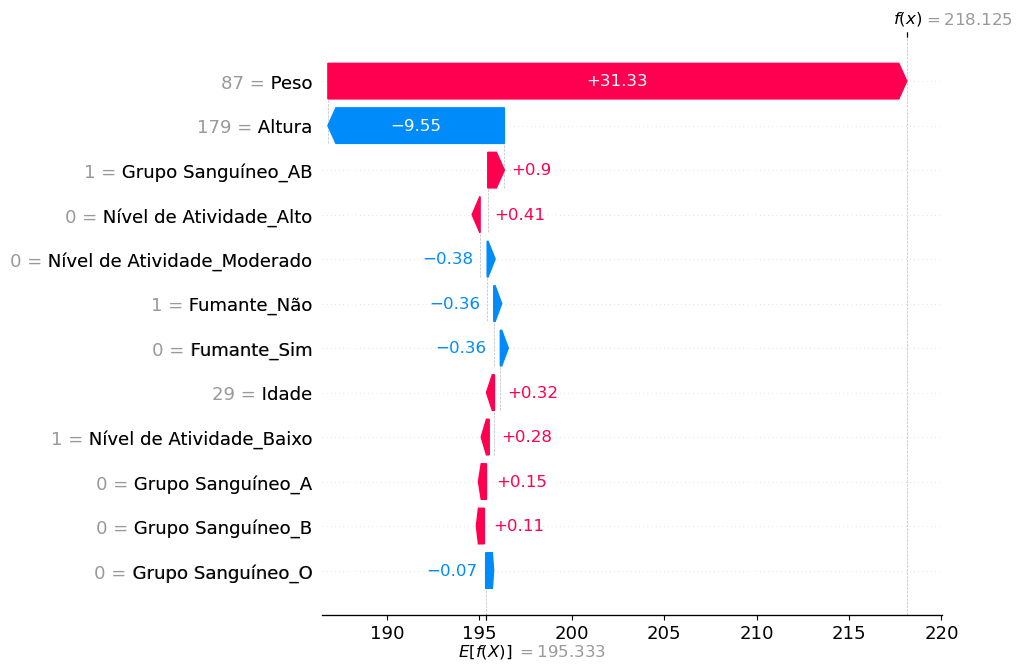

In [19]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

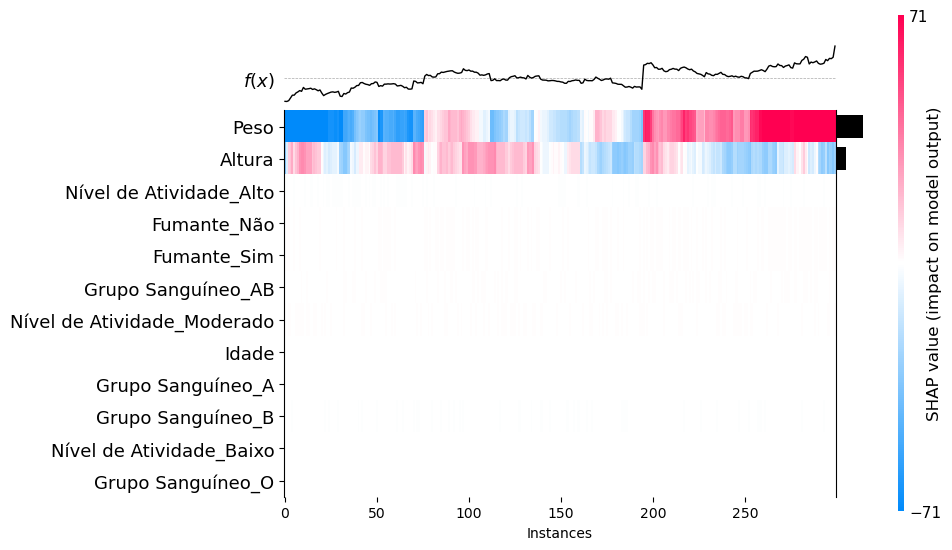

<Axes: xlabel='Instances'>

In [20]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_reg, max_display=13)

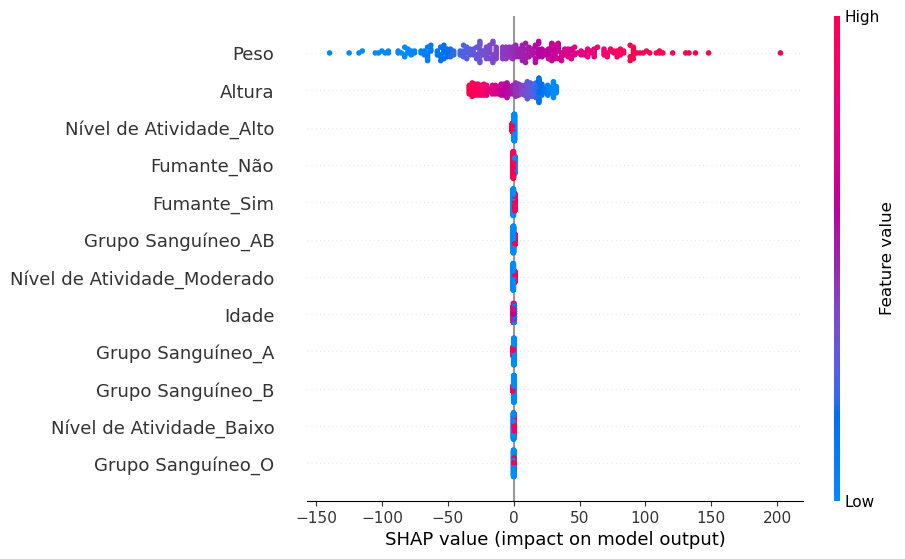

In [ ]:
# Plot de Beeswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

## Carregar e preparar dados - Classificação

In [23]:
df2 = pd.read_csv('./fruit_quality.csv')

In [24]:
df2.drop('A_id', axis=1, inplace=True)
df2['Quality'] = (df2["Quality"] == "good").astype('int32')

df2.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 234.5 KB


## Treinar o modelo de Regressão Logística

In [26]:
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [28]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Apresentar Plots Shapley Values - Classificação

In [29]:
# Rodar o explainer no conjunto de treinamento
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [30]:
# Calcular o Shapley Values no conjunto de testes
shap_values_class = explainer_class(X_test)

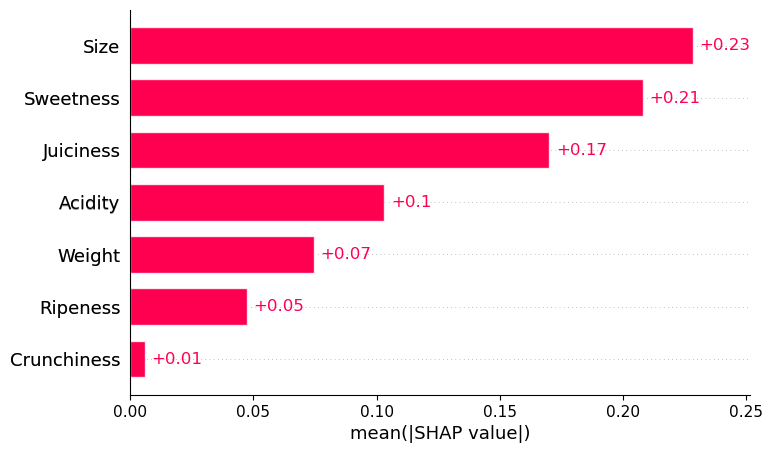

In [31]:
# Plotar a contribuição geral por Shap Values
shap.plots.bar(shap_values_class)

In [32]:
# Mostrar 1° instância do conjunto de testes
X_test.iloc[0,:]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

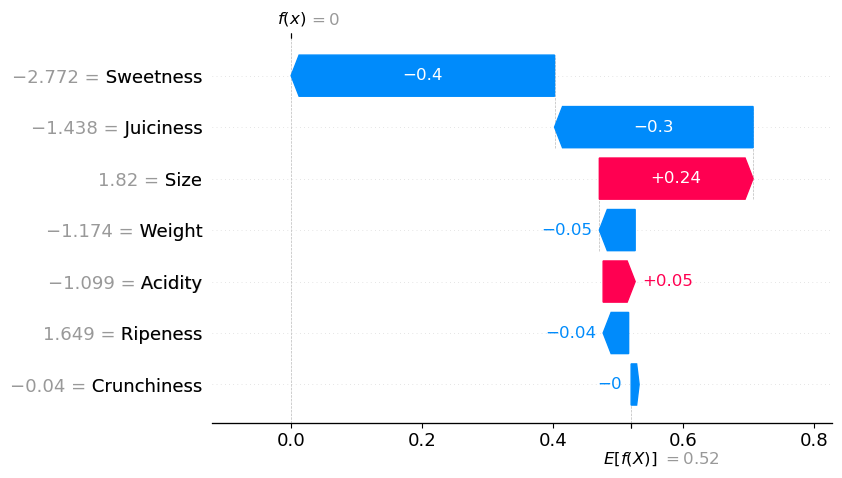

In [33]:
# Plotar os Shap Values para um exemplo específico
shap.plots.waterfall(shap_values_class[0], max_display=13)

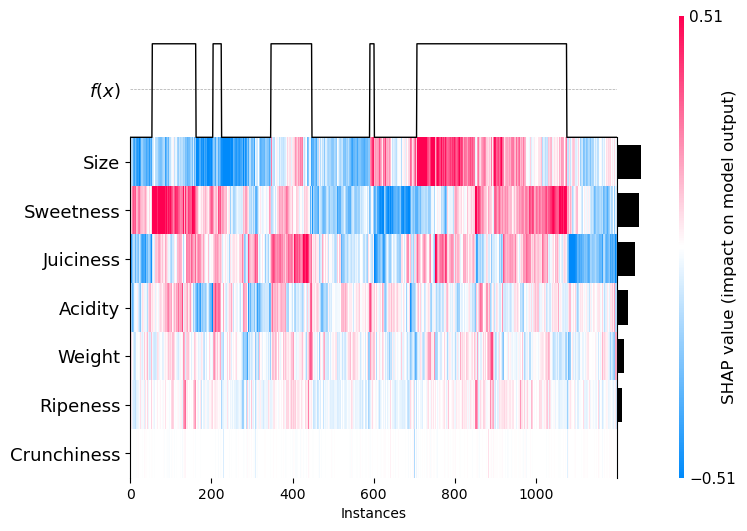

<Axes: xlabel='Instances'>

In [34]:
# Plotar Heatmap Geral
shap.plots.heatmap(shap_values_class, max_display=13)

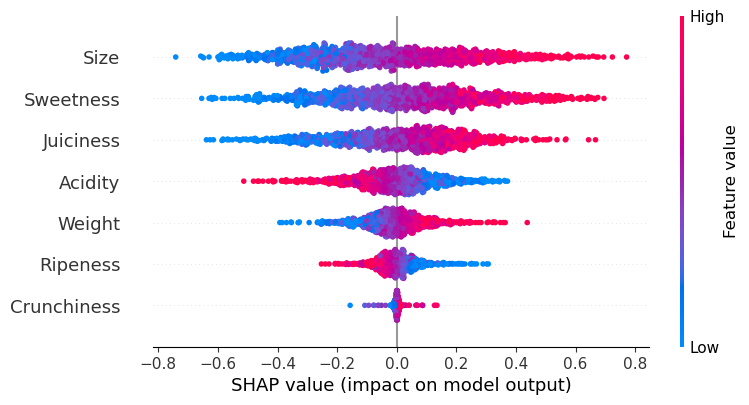

In [35]:
# Plot de Beeswarm Geral
shap.plots.beeswarm(shap_values_class, max_display=13)